In [5]:
#Ипортируем основные библиотеки

In [86]:
%matplotlib inline
import matplotlib as plt
import pandas as pd
import regex as re
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
#Загружаем данные скачанные с 
#https://docs.google.com/spreadsheets/d/1nUqniflMlo-kWJk3OjmZYZ1OWVlBLno6/edit#gid=2095307267
# формате .csv

In [3]:
data_car = pd.read_csv('auto_complectations.csv')

In [4]:
data_car.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [5]:
# Проверка размерности данных

In [6]:
data_car.shape

(1703, 21)

In [7]:
# Проверим на наличие пропущенных значений.

In [8]:
data_car.isnull().sum()

brand                                                    0
model                                                    0
complect                                                 0
type_car                                                 0
seats                                                    0
doors                                                    0
Двигатель                                                0
Мощность                                                 0
Крутящий момент двигателя                                0
Коробка передач                                          0
Привод                                                   0
Разгон до сотни                                          0
Максимальная скорость                                    0
Расход топлива (л/100 км)\nгород / трасса / смешанный    0
Дорожный просвет                                         0
Габариты (длина × ширина × высота)                       0
Колёсная база                                           

In [9]:
# Пропущенных значений в дата фрейме не обнаружено.

In [10]:
# проверим количестко уникальних значений в каждой фиче.

In [11]:
data_car.apply(lambda x : x.unique().size,axis=0)

brand                                                      27
model                                                     246
complect                                                 1400
type_car                                                   37
seats                                                       8
doors                                                       7
Двигатель                                                 116
Мощность                                                  130
Крутящий момент двигателя                                 131
Коробка передач                                            16
Привод                                                      3
Разгон до сотни                                           112
Максимальная скорость                                      99
Расход топлива (л/100 км)\nгород / трасса / смешанный     558
Дорожный просвет                                           89
Габариты (длина × ширина × высота)                        278
Колёсная

In [12]:
1400*100/1703 

82.20786846741045

In [13]:
# Проверим в каких колонках какие типы данных
data_car.dtypes

brand                                                    object
model                                                    object
complect                                                 object
type_car                                                 object
seats                                                     int64
doors                                                     int64
Двигатель                                                object
Мощность                                                 object
Крутящий момент двигателя                                object
Коробка передач                                          object
Привод                                                   object
Разгон до сотни                                          object
Максимальная скорость                                    object
Расход топлива (л/100 км)\nгород / трасса / смешанный    object
Дорожный просвет                                         object
Габариты (длина × ширина × высота)      

In [28]:
# Произведм форматирование фичей, переведем в количественный формат данных те фичи которые возможно:
# и запишим получившиеся данные в новый датафрейм для удобства обработки

In [30]:
df = pd.DataFrame(data_car['brand'].apply(lambda x: len(x)))
df['model'] = data_car['model'].apply(lambda x: len(x))
df['complect'] = data_car['complect'].apply(lambda x: len(x))
# выделим из фичи type_car только класс без подкласса
df['type'] = data_car['type_car'].apply(lambda x: x.lower())

In [32]:
df['type'].unique()

array(['седан класса c', 'хэтчбек класса b', 'седан класса d',
       'универсал повышенной проходимости класса d', 'универсал класса d',
       'купе класса d', 'хэтчбек класса d', 'седан класса e',
       'универсал класса e', 'хэтчбек класса e', 'седан класса f',
       'большой кроссовер', 'компактный кроссовер',
       'среднеразмерный кроссовер', 'купе класса c', 'спорткупе',
       'кабриолет с мягкой крышей', 'спорткупе класса d',
       'спортседан класса e', 'родстер', 'большой внедорожник',
       'седан класса b', 'хэтчбек класса a', 'кроссовер класса b', 'вэн',
       'горячий хэтчбек класса c', 'внедорожник класса b',
       'среднеразмерный внедорожник', 'хэтчбек класса c',
       'универсал класса c', 'спортседан класса d', 'купе класса e',
       'пикап', 'горячий седан класса c', 'минивэн', 'компактвэн',
       'универсал повышенной проходимости класса e'], dtype=object)

In [33]:
list_type = {'внедорожник',
 'вэн',
 'кабриолет',
 'компактвэн',
 'кроссовер',
 'купе',
 'минивэн',
 'пикап',
 'родстер',
 'седан',
 'спорткупе',
 'спортседан',
 'универсал',
 'хэтчбек'}

In [34]:
df['type'] = df['type'].apply(lambda s: re.split(' ', s))

In [35]:
def return_type_car(s):
    for i in s:
        if i in list_type:
            return i
df['type'] = df['type'].apply(lambda s: return_type_car(s))

In [36]:
df['seats'] = data_car['seats']
df['doors'] = data_car['doors']


In [37]:
# Преобразуем колонку Двигатель в две фичи "тип двигателя" "объемдвигателя"
data_car['Двигатель']

0       бензиновый (1395 см³)
1       бензиновый (1395 см³)
2       бензиновый (1984 см³)
3       бензиновый (1984 см³)
4       бензиновый (1984 см³)
                ...          
1698     дизельный (1969 см³)
1699    бензиновый (1969 см³)
1700     дизельный (1969 см³)
1701     гибридный (1969 см³)
1702     гибридный (1969 см³)
Name: Двигатель, Length: 1703, dtype: object

In [38]:
for _ in ['(', 'см³', ')']: 
     data_car['Двигатель'] = data_car['Двигатель'].str.replace(_, "", regex=False)

In [39]:
 temp_engen = data_car['Двигатель'].apply(lambda x: x.split())


In [72]:
df['engen_type'] = temp_engen.str.get(0)
df['engen_type'] = label_encoder.fit_transform(df['engen_type'])
df['engen_vol'] = pd.to_numeric(temp_engen.str.get(-1))


In [73]:
df['engen_type'].unique()

array([0, 2, 3, 1])

In [42]:
df['Мощность'] = pd.to_numeric(data_car['Мощность'].str.replace(' л. с.', '', regex=False))
df['Момент'] = pd.to_numeric(data_car['Крутящий момент двигателя'].str.replace(' Н·м', '', regex=False))

In [43]:
tmp_transm = data_car['Коробка передач'].apply(lambda x: x.split(' '))

In [74]:
df['taransm_type'] = tmp_transm.str.get(0)
df['taransm_type'] = label_encoder.fit_transform(df['taransm_type'])

In [76]:
df['taransm_level'] = pd.to_numeric(tmp_transm.str.get(1).str.replace('(', '', regex=False))

In [46]:
data_car['Привод'].unique()

array(['передний', 'полный', 'задний'], dtype=object)

In [78]:
df['привод'] = label_encoder.fit_transform(df['привод'])

In [48]:
tmp_acceleration = data_car['Разгон до сотни'].apply(lambda x: x.split(' ')).str.get(0)

In [49]:
# В данных есть пропущенные значения 'нет'
tmp_acceleration.unique()

array(['8.2', '6.8', '6.2', '8.9', '7.1', '5.8', '9.2', '7.3', '5.7',
       '9.1', '7.5', '6', '7.9', '8.4', '6.5', '5.1', '8.1', '8.6', '6.3',
       '5.3', '5.6', '6.6', '4.4', '4.5', '7.4', '6.9', '7', '5.9', '4.6',
       '3.8', '5.4', '4.8', '8.8', '8.7', '7.7', '8.3', '7.6', '7.2',
       '7.8', '4', '4.7', '8', '5.2', '3.7', '4.9', '3.9', '4.2', '3.3',
       '3.4', '3.2', '9.7', '9.3', '9.6', '9.4', '4.1', '6.4', '5.5',
       '4.3', '6.1', '6.7', '9.9', '11.7', '12.6', '12.2', '12.3', '12.4',
       '14', '10.6', '10.9', '12.5', '11.4', '12.7', 'нет', '12.1',
       '12.9', '13.1', '10.7', '11.3', '11.6', '17.6', '14.4', '10.5',
       '10.4', '10.3', '9', '11.2', '11.1', '11.8', '9.5', '11.9', '10.2',
       '9.8', '5', '11.5', '10.8', '14.1', '13.4', '10.1', '12', '8.5',
       '3.6', '11', '13.3', '15.2', '13.2', '13.9', '13.5', '13', '10',
       '13.8', '13.7', '12.8'], dtype=object)

In [50]:
tmp_acceleration[tmp_acceleration == 'нет'].count()

71

In [51]:
# Заменим "нет" на 0

In [52]:
tmp_acceleration[tmp_acceleration == 'нет'] = 0

In [53]:
df['разгон'] = pd.to_numeric(tmp_acceleration)

In [54]:
tmp_speed = data_car['Максимальная скорость'].apply(lambda x: x.split(' ')).str.get(0)

In [55]:
tmp_speed.unique()

array(['224', '250', '242', '220', '244', '236', '210', '241', '225',
       '223', '237', '232', '200', '207', '215', '226', '235', '230',
       '233', '240', '150', '160', '280', '305', '204', '205', '206',
       '213', '234', '222', '243', '245', '227', '180', '169', '170',
       '178', '179', '161', '165', '183', '189', '188', '187', '198',
       '211', '184', '190', '167', '195', '203', '168', '185', '193',
       '192', '186', '181', '201', '216', '208', '217', '283', '275',
       '322', '228', '0', '257', '196', '202', '176', '174', '175', '182',
       '270', '191', '209', '218', '274', '177', '239', '199', '290',
       '229', '231', '238', '246', '318', '285', '315', '194', '173',
       '171', '166', '172', '163', '219', '145', '140', '157'],
      dtype=object)

In [56]:
df['max_spees'] = pd.to_numeric(tmp_speed)

In [57]:
tmp_rate =  data_car['Расход топлива (л/100 км)\nгород / трасса / смешанный'].apply(lambda x: x.split('/'))

In [58]:
df['rate_city'] =pd.to_numeric(tmp_rate.str.get(0))
df['rate_highway'] = pd.to_numeric(tmp_rate.str.get(1))
df['rate_combi'] = pd.to_numeric(tmp_rate.str.get(2))

In [59]:
df['клиренс'] = pd.to_numeric(data_car['Дорожный просвет'].str.replace(' мм', '', regex=False))

In [60]:
tmp_profile = data_car['Габариты (длина × ширина × высота)'].apply(lambda x: x.split(' × '))

In [61]:
df['car_length'] =pd.to_numeric(tmp_profile.str.get(0))
df['rate_width'] = pd.to_numeric(tmp_profile.str.get(1))
df['rate_height'] = pd.to_numeric(tmp_profile.str.get(2))

In [62]:
df['wheelbase'] = pd.to_numeric(data_car['Колёсная база'].str.replace(' мм', '', regex=False))

In [63]:
df['vol_trunk'] = pd.to_numeric(data_car['Объём багажника'].str.replace(' л', '', regex=False))
df['max_vol_trunk'] = pd.to_numeric(data_car['Объём багажника максимальный'].str.replace(' л', '', regex=False))
df['fuel_trunk'] = pd.to_numeric(data_car['Объём топливного бака'].str.replace(' л', '', regex=False))

In [64]:
df['mass'] = pd.to_numeric(data_car['Масса автомобиля'].str.replace(' кг', '', regex=False))

In [79]:
# После всех преобразование дата фрем приобред следующий вид
df

,brand,model,complect,type,seats,doors,engen_type,engen_vol,Мощность,Момент,...,rate_combi,клиренс,car_length,rate_width,rate_height,wheelbase,vol_trunk,max_vol_trunk,fuel_trunk,mass
0,4,8,13,седан,5,4,0,1395,150,250,...,4.8,165,4458,1796,1416,2637,425,880,50,1320
1,4,8,19,седан,5,4,0,1395,150,250,...,4.8,165,4458,1796,1416,2637,425,880,50,1320
2,4,8,13,седан,5,4,0,1984,190,320,...,5.6,165,4458,1796,1416,2637,425,880,50,1395
3,4,8,21,седан,5,4,0,1984,190,320,...,5.7,165,4458,1796,1416,2637,390,845,55,1465
4,4,8,19,седан,5,4,0,1984,190,320,...,5.6,165,4458,1796,1416,2637,425,880,50,1395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,5,4,17,кроссовер,5,5,2,1969,235,480,...,5.8,237,4950,2008,1776,2984,721,1899,71,1969
1699,5,4,17,кроссовер,7,5,0,1969,320,400,...,8.3,237,4950,2008,1776,2984,692,1899,71,2004
1700,5,4,17,кроссовер,7,5,2,1969,235,480,...,5.8,237,4950,2008,1776,2984,692,1899,71,2009
1701,5,4,20,кроссовер,7,5,1,1969,407,640,...,2.1,237,4950,2008,1776,2984,640,1899,70,2350


In [ ]:
df.dtypes

In [147]:
df.apply(lambda x : x.unique().size,axis=0)

brand             27
model            246
type              14
seats              8
doors              7
engen_type         4
engen_vol         96
Мощность         130
Момент           131
taransm_type       4
taransm_level      9
привод             3
разгон           112
max_spees         99
rate_city        120
rate_highway      69
rate_combi        93
клиренс           89
car_length       212
rate_width       132
rate_height      190
wheelbase        143
vol_trunk        155
max_vol_trunk    194
fuel_trunk        55
mass             423
dtype: int64

In [ ]:
# В кочестве первоночального классификатора возьмем Наивный Бейсовский Классификатор 

In [312]:
from sklearn.naive_bayes import MultinomialNB

In [313]:
X = df.drop(['type'], axis=1)
y = df['type']

In [314]:
name = df['type'].unique()

In [315]:

y = label_encoder.fit_transform(y)

In [316]:
# Разделим данные на учебные и тестовые выборки 

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [318]:
labes = model.predict(X_test)


Text(91.68, 0.5, 'predict label')

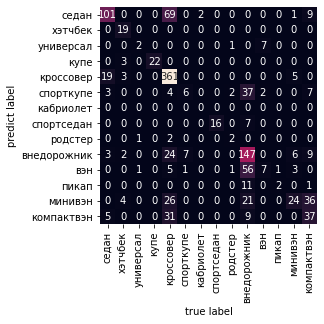

In [319]:
mat = confusion_matrix(y_test, labes)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=name, yticklabels=name)
plt.xlabel('true label')
plt.ylabel('predict label')

In [320]:
# Точность классификатора составила 

In [321]:
accuracy_score(y_test, labes)

0.625314333612741

In [322]:
# В качестве второго классификатора воспользуемся ансамблем решающих деревьев 
# И подбором наилучших параметров через GridSearchCV

In [330]:
params = {
    'n_estimators':range(45,55,1),
    'max_depth':range(45,60,2),
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,5,1)  
}

clf_f = RandomForestClassifier(criterion='gini')
grid_serch_clf = GridSearchCV(clf_f,params,cv=3)
grid_serch_clf.fit(X_train,y_train)
grid_serch_clf.best_params_

c:\users\lagutov\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


{'max_depth': 47,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 51}

In [331]:
predicted_y =  grid_serch_clf.predict(X_test)
accuracy_score(y_test, predicted_y)

0.9656328583403185

In [ ]:
# Точность предсказания составила 0,96 при обучающей  выборке в 0,3